# **Vehicle dataset**
**Source:** **`Kaggle`**

The dataset contains details about used cars, including brand, model, year, selling price, present price, kilometers driven, fuel type, seller type, transmission, and owner history

**Aim**

- **Find out the distribution of price across the years**
- **Find out how features has affected the price and demand over time**
- **Build a machine learning model to predict the selling price of a used car based on its features.**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
dt=pd.read_csv(r"H:\Documents\Data Projects\CodeAnt\car details v4.csv")
dt.head() 

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [3]:
# Checking the information of the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [4]:
dt.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

**The data contains null values in 9 columns as printed above**

**To handle the null values, lets find out the % of the null values to the entire dataset**

**This will deteremine if null values will be filled or dropped**

In [5]:
# Shape of the dataframe
shape=dt.shape
shape

(2059, 20)

In [6]:
# Findind the missing values in each column
missing=dt.isnull().sum()
missing

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [7]:
# Finding the number of total cells in the DataFrame
total_cells=np.product(shape)
total_cells

41180

In [8]:
# Finding the number of cells with missing values
total_missing=missing.sum()
total_missing

745

In [9]:
# Calculating the percentage
perecent_missing=(total_missing/total_cells)*100
perecent_missing

1.8091306459446332

**1.8% of the entire data values is missing. We will drop missing values**

In [10]:
dtt = dt.dropna()

# Check the new shape of the dataset
print("Original dataset shape:", dt.shape)
print("Cleaned dataset shape:", dtt.shape)

Original dataset shape: (2059, 20)
Cleaned dataset shape: (1874, 20)


In [11]:
dtt.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

In [12]:
# setting the display options to two decimal points for all numerical varaibles
pd.set_option('display.float_format',lambda x:'%.2f' % x)
dtt

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.00,1680.00,1505.00,5.00,35.00
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.00,1695.00,1555.00,5.00,42.00
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.00,1595.00,1550.00,5.00,35.00
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.00,1745.00,1510.00,5.00,37.00
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.00,1830.00,1795.00,7.00,55.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,Maruti Suzuki,Ritz Vxi (ABS) BS-IV,245000,2014,79000,Petrol,Manual,Faridabad,White,Second,Individual,1197 cc,85 bhp @ 6000 rpm,113 Nm @ 4500 rpm,FWD,3775.00,1680.00,1620.00,5.00,43.00
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.00,1890.00,1785.00,7.00,70.00
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.00,1550.00,1500.00,5.00,32.00
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.00,1680.00,1427.00,5.00,45.00


**Viewing numerical features on a boxplot**

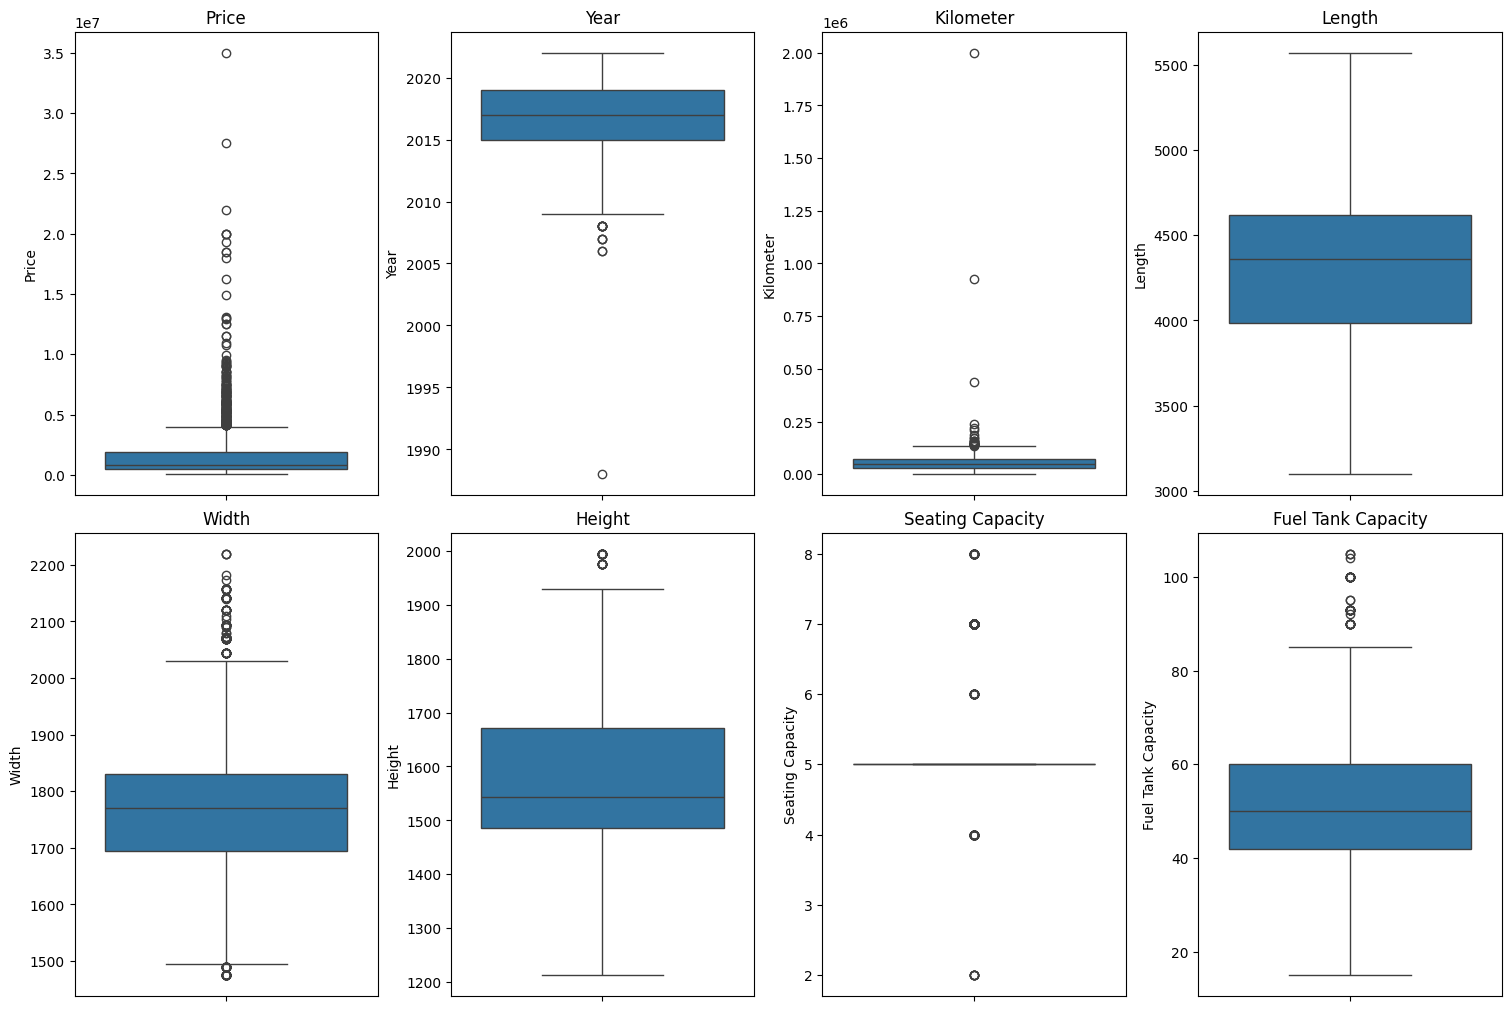

In [13]:
# Identify the numerical columns in the DataFrame
numerical_columns = dtt.select_dtypes(include=['number']).columns

# Set the number of rows and columns for subplots
n_cols = 4  # Number of boxplots per row
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate the number of rows

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=dtt, y=col, ax=axes[i])  # Create boxplot for the column
    axes[i].set_title(col)  # Set the title as the column name

# Remove any unused subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.show()

###### **There are a good number of outlier values in the dataset**

**It is important to understand if the outliers is legitimate or erroneous**

In a car dataset where values like price, mileage, or features naturally have a wide range, it is not always wise to remove outliers outright. luxury or premium cars (e.g., selling for 3M) could be real and not erroneous data.

One erroneous oultier in the **`Year`** column is the 1988 year which will be remove. The next year after that is 2006

In the **`Price`** and **`Kilometer`** columns, the values above the upper_bound (detected as outliers) are much. From the context of the data, we can infer that these values are legitimate and not erroneous. 

However these high values in the **`Price`** column are concentrated between **5million** to **10million**, with only **21** values above 10 million up **35million**. To avoid a skewed data and a bad model, we will put a cap at 10million by removing values above 10 million

Same thing appplies to the **`Kilometer`** column, with only **6** values above **200000** cluster

In [14]:
# Viewing the Year values
dtt['Year'].unique()

array([2017, 2014, 2011, 2019, 2018, 2015, 2016, 2020, 2013, 2009, 2010,
       2021, 2012, 2006, 2022, 2007, 2008, 1988], dtype=int64)

In [15]:
# No of Price values above 10m and  No of Kilometer value above 200k
print(dtt[dtt['Price']>10000000].shape)

print(dtt[dtt['Kilometer']>200000].shape)

(21, 20)
(6, 20)


In [16]:
#Removing the 1988 year from the Year column
dtt[dtt['Year']==1988]

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
995,Mercedes-Benz,E-Class E 200 Avantgarde,1300000,1988,71000,Petrol,Automatic,Dehradun,Red,Third,Individual,1991 cc,181 bhp @ 5500 rpm,300 Nm @ 1200 rpm,RWD,5063.00,1860.00,1494.00,5.00,80.00


In [17]:
# Removing inddex 995
dtt = dtt.drop(index=995)

In [18]:
dtt['Year'].unique()

array([2017, 2014, 2011, 2019, 2018, 2015, 2016, 2020, 2013, 2009, 2010,
       2021, 2012, 2006, 2022, 2007, 2008], dtype=int64)

In [19]:
# Filtering records above those values
dtt = dtt[dtt['Price'] <= 10000000]
dtt = dtt[dtt['Kilometer'] <= 200000]

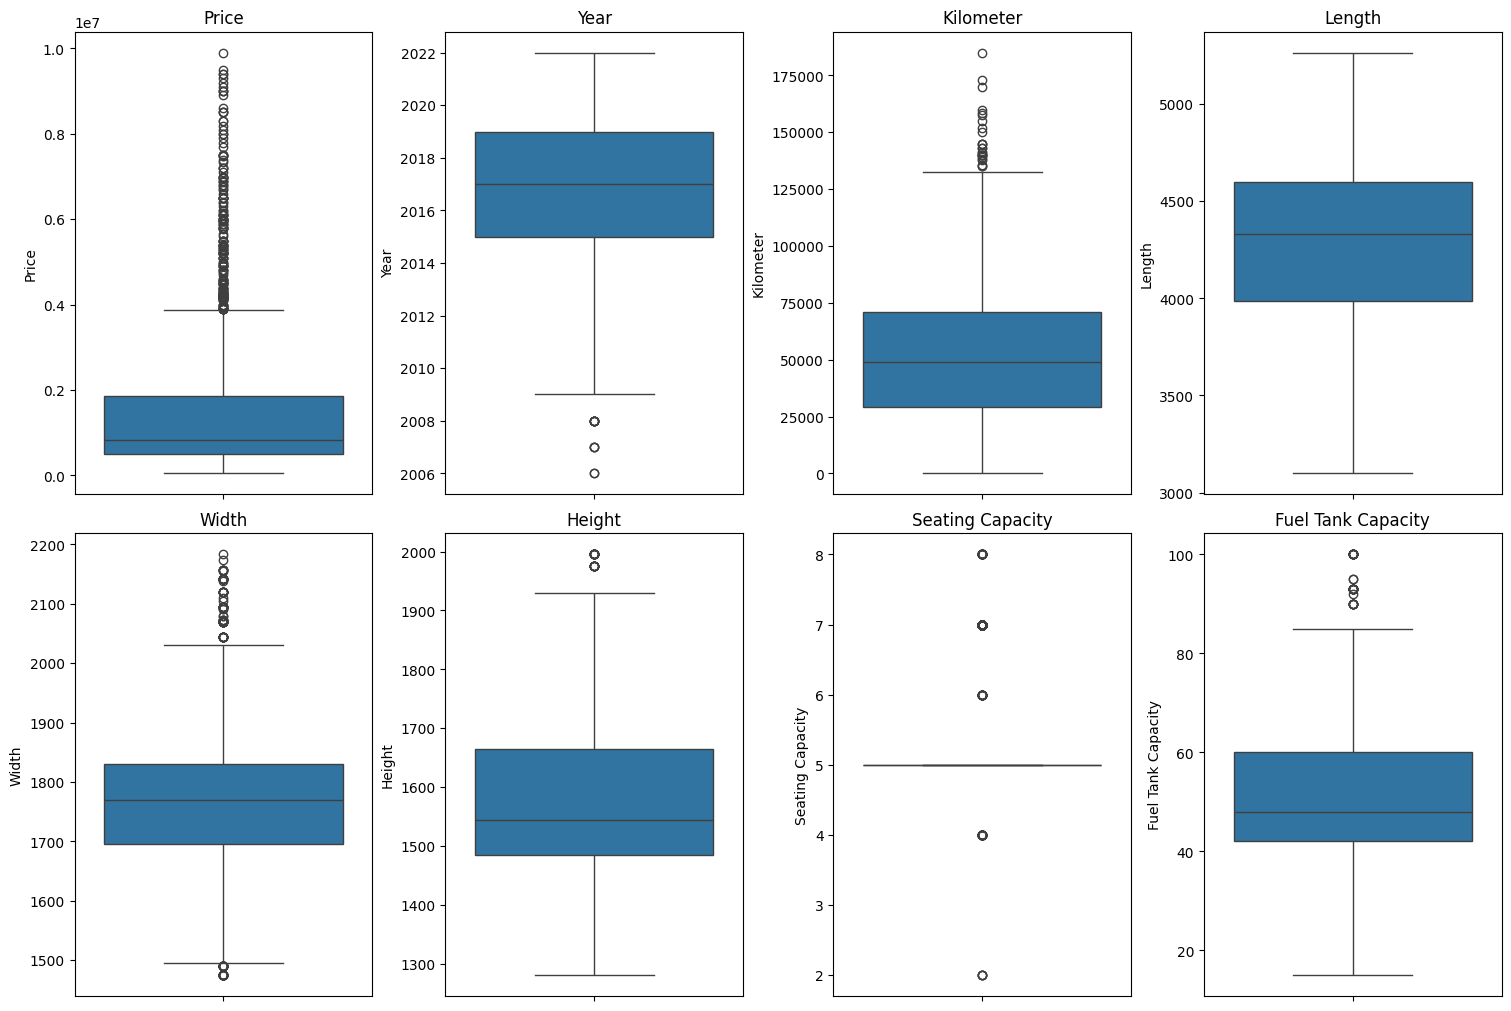

In [20]:
# Identify the numerical columns in the DataFrame
numerical_columns = dtt.select_dtypes(include=['number']).columns

# Set the number of rows and columns for subplots
n_cols = 4  # Number of boxplots per row
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate the number of rows

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=dtt, y=col, ax=axes[i])  # Create boxplot for the column
    axes[i].set_title(col)  # Set the title as the column name

# Remove any unused subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [21]:
# Checking for duplicates
dtt.duplicated().any()

False

In [22]:
# Checking all the columns and number of unique values and their individual data types

for i in dtt.columns:
    unique_val = dtt[i].nunique()
    typ = dtt[i].dtype
    print(f"{i} : {unique_val} : {typ}")

Make : 30 : object
Model : 936 : object
Price : 569 : int64
Year : 17 : int64
Kilometer : 779 : int64
Fuel Type : 7 : object
Transmission : 2 : object
Location : 75 : object
Color : 16 : object
Owner : 4 : object
Seller Type : 3 : object
Engine : 100 : object
Max Power : 299 : object
Max Torque : 255 : object
Drivetrain : 3 : object
Length : 222 : float64
Width : 159 : float64
Height : 182 : float64
Seating Capacity : 6 : float64
Fuel Tank Capacity : 52 : float64


**Narrowing down the analysis to some factors that have affected price over the years.
Proceeding to build a regression model, we will be dropping some not so relavant features**

In [23]:
dn=dtt.drop(columns=['Model','Location','Color','Seller Type','Engine','Max Power','Max Torque','Length','Width','Height'],axis=1)
dn

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Owner,Drivetrain,Seating Capacity,Fuel Tank Capacity
0,Honda,505000,2017,87150,Petrol,Manual,First,FWD,5.00,35.00
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Second,FWD,5.00,42.00
2,Hyundai,220000,2011,67000,Petrol,Manual,First,FWD,5.00,35.00
3,Toyota,799000,2019,37500,Petrol,Manual,First,FWD,5.00,37.00
4,Toyota,1950000,2018,69000,Diesel,Manual,First,RWD,7.00,55.00
...,...,...,...,...,...,...,...,...,...,...
2053,Maruti Suzuki,245000,2014,79000,Petrol,Manual,Second,FWD,5.00,43.00
2054,Mahindra,850000,2016,90300,Diesel,Manual,First,FWD,7.00,70.00
2055,Hyundai,275000,2014,83000,Petrol,Manual,Second,FWD,5.00,32.00
2056,Ford,240000,2013,73000,Petrol,Manual,First,FWD,5.00,45.00


In [24]:
dn.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1846.00,1544672.22,1692507.88,49000.00,499250.00,825000.00,1850000.00,9900000.00
Year,1846.00,2016.71,3.06,2006.00,2015.00,2017.00,2019.00,2022.00
Kilometer,1846.00,51526.34,29918.81,0.00,29000.00,49000.00,71000.00,185000.00
Seating Capacity,1846.00,5.30,0.80,2.00,5.00,5.00,5.00,8.00
Fuel Tank Capacity,1846.00,51.82,14.80,15.00,42.00,48.00,60.00,100.00


In [25]:
dn_corr=dn.select_dtypes(include='number').corr()
dn_corr

,Price,Year,Kilometer,Seating Capacity,Fuel Tank Capacity
Price,1.00,0.39,-0.28,0.04,0.65
Year,0.39,1.00,-0.57,-0.00,0.04
Kilometer,-0.28,-0.57,1.00,0.23,0.13
Seating Capacity,0.04,-0.00,0.23,1.00,0.33
Fuel Tank Capacity,0.65,0.04,0.13,0.33,1.00


<Axes: >

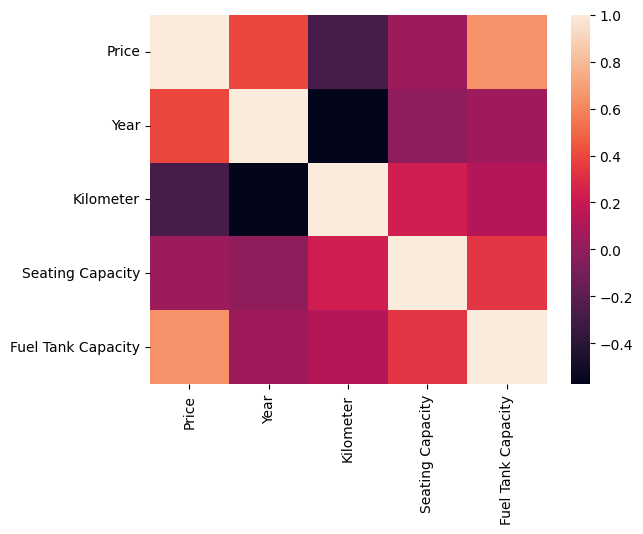

In [26]:
sns.heatmap(dn_corr)

In [27]:
price_count=dn.groupby('Year')['Price'].count()
price_count.sort_values()

Year
2006      2
2007      3
2008      7
2010     21
2009     26
2011     47
2012     57
2022     74
2013    109
2020    121
2021    142
2015    168
2014    175
2016    180
2019    209
2018    252
2017    253
Name: Price, dtype: int64

In [28]:
price_sum=dn.groupby('Year')['Price'].sum()
price_sum.sort_values()

Year
2006       440000
2007      1645000
2008      1718000
2009      8435000
2010     10937999
2011     27220999
2012     49444995
2013     69588994
2014    167805995
2015    171444990
2016    212847992
2022    248201998
2020    314790995
2021    368179993
2017    376494991
2019    377954989
2018    444311985
Name: Price, dtype: int64

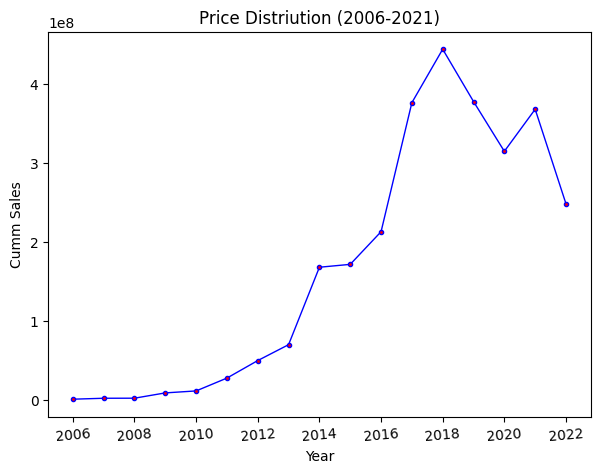

In [29]:
plt.figure(figsize=(7, 5))
plt.plot(price_sum.index,price_sum.values,color='blue',
         marker='o',linewidth=1,markersize=3,markerfacecolor='red')
plt.title('Price Distriution (2006-2021)')
plt.ylabel('Cumm Sales')
plt.xlabel('Year')
plt.xticks(rotation=5)
plt.show()

Peak sale year: 2018

## **Taking a look at how other Features interact with price**

### **Transmisssion**

In [30]:
trava=dn['Transmission'].value_counts()
trava

Transmission
Manual       1034
Automatic     812
Name: count, dtype: int64

In [31]:
trans_count = dn.pivot_table(index='Year', columns='Transmission', values='Price', aggfunc='count')
trans_count

Transmission,Automatic,Manual
Year,,
2006,1,1
2007,2,1
2008,3,4
2009,4,22
2010,6,15
2011,15,32
2012,21,36
2013,30,79
2014,70,105


In [32]:
trans_sum = dn.pivot_table(index='Year', columns='Transmission', values='Price', aggfunc='sum')
trans_sum

Transmission,Automatic,Manual
Year,,
2006,250000,190000
2007,1095000,550000
2008,1015000,703000
2009,3445000,4990000
2010,5870000,5067999
2011,16825000,10395999
2012,33259999,16184996
2013,34820000,34768994
2014,117786999,50018996


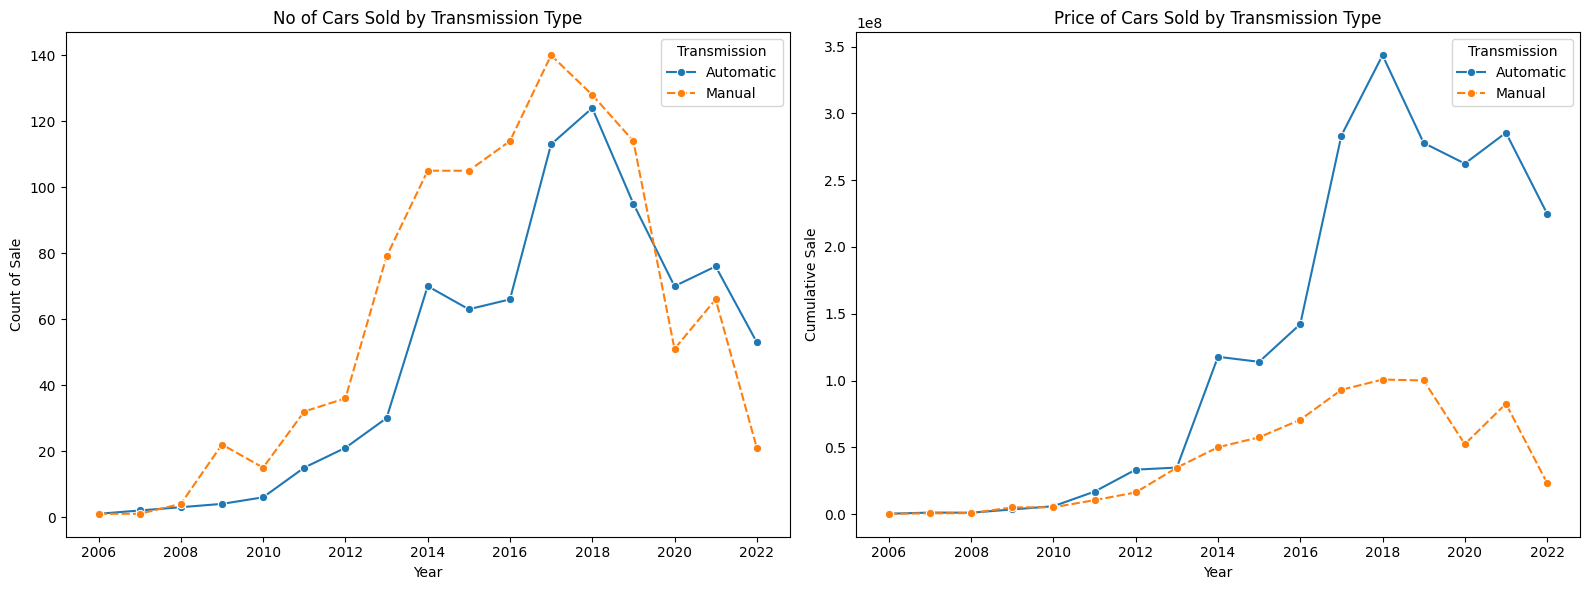

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.lineplot(data=trans_count, ax=axes[0], marker='o')
axes[0].set_title('No of Cars Sold by Transmission Type')
axes[0].set_ylabel('Count of Sale')
axes[0].set_xlabel('Year')

# Second chart
sns.lineplot(data=trans_sum, ax=axes[1], marker='o')
axes[1].set_title('Price of Cars Sold by Transmission Type')
axes[1].set_ylabel('Cumulative Sale')
axes[1].set_xlabel('Year')

# plt.figure(figsize=(8,6))
# sns.lineplot(trans_count, marker='o')
# plt.title('No of cars sold by Transmission type')
# plt.ylabel('Count of sale')
# plt.xlabel('Year')

# plt.figure(figsize=(8,6))
# sns.lineplot(trans_sum, marker='o')
# plt.title('No of cars sold by Transmission type')
# plt.ylabel('Count of sale')
# plt.xlabel('Year')

plt.tight_layout()
plt.show()

### **Interesting relavation here**
**The number of Manual and Automatic cars sold were almost similar up on till 2008 when the Manual cars started to sell more**

**This coincided with the period the cost of Automatic Transmission cars started to go up**

**The sale perfomance of the Manual Transmission vehicles was largely due to how cheap it was to the Automatic cars**

**Overall, the Manual transmission vehicle sold more from 2008 - 2019 before it started to plummet**

### **Fuel Type**

In [34]:
dn['Fuel Type'].value_counts()

Fuel Type
Diesel          942
Petrol          851
CNG              45
LPG               4
Hybrid            2
CNG + CNG         1
Petrol + CNG      1
Name: count, dtype: int64

In [35]:
fuel_count = dn.pivot_table(index='Year', columns='Fuel Type', values='Price', aggfunc='count')
fuel_count

Fuel Type,CNG,CNG + CNG,Diesel,Hybrid,LPG,Petrol,Petrol + CNG
Year,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,2.00,NaN
2007,NaN,NaN,1.00,NaN,NaN,2.00,NaN
2008,NaN,NaN,3.00,NaN,NaN,4.00,NaN
2009,2.00,NaN,5.00,NaN,1.00,18.00,NaN
2010,NaN,NaN,6.00,NaN,NaN,15.00,NaN
2011,1.00,NaN,16.00,NaN,1.00,29.00,NaN
2012,NaN,NaN,28.00,NaN,1.00,28.00,NaN
2013,2.00,NaN,69.00,NaN,NaN,38.00,NaN
2014,4.00,1.00,97.00,NaN,1.00,72.00,NaN


In [36]:
fuel_sum = dn.pivot_table(index='Year', columns='Fuel Type', values='Price', aggfunc='sum')
fuel_sum

Fuel Type,CNG,CNG + CNG,Diesel,Hybrid,LPG,Petrol,Petrol + CNG
Year,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,440000.00,NaN
2007,NaN,NaN,550000.00,NaN,NaN,1095000.00,NaN
2008,NaN,NaN,1005000.00,NaN,NaN,713000.00,NaN
2009,300000.00,NaN,2650000.00,NaN,195000.00,5290000.00,NaN
2010,NaN,NaN,4290000.00,NaN,NaN,6647999.00,NaN
2011,155000.00,NaN,10544999.00,NaN,275000.00,16246000.00,NaN
2012,NaN,NaN,32562998.00,NaN,235000.00,16646997.00,NaN
2013,475000.00,NaN,52285994.00,NaN,NaN,16828000.00,NaN
2014,1642000.00,249000.00,125905999.00,NaN,225000.00,39783996.00,NaN


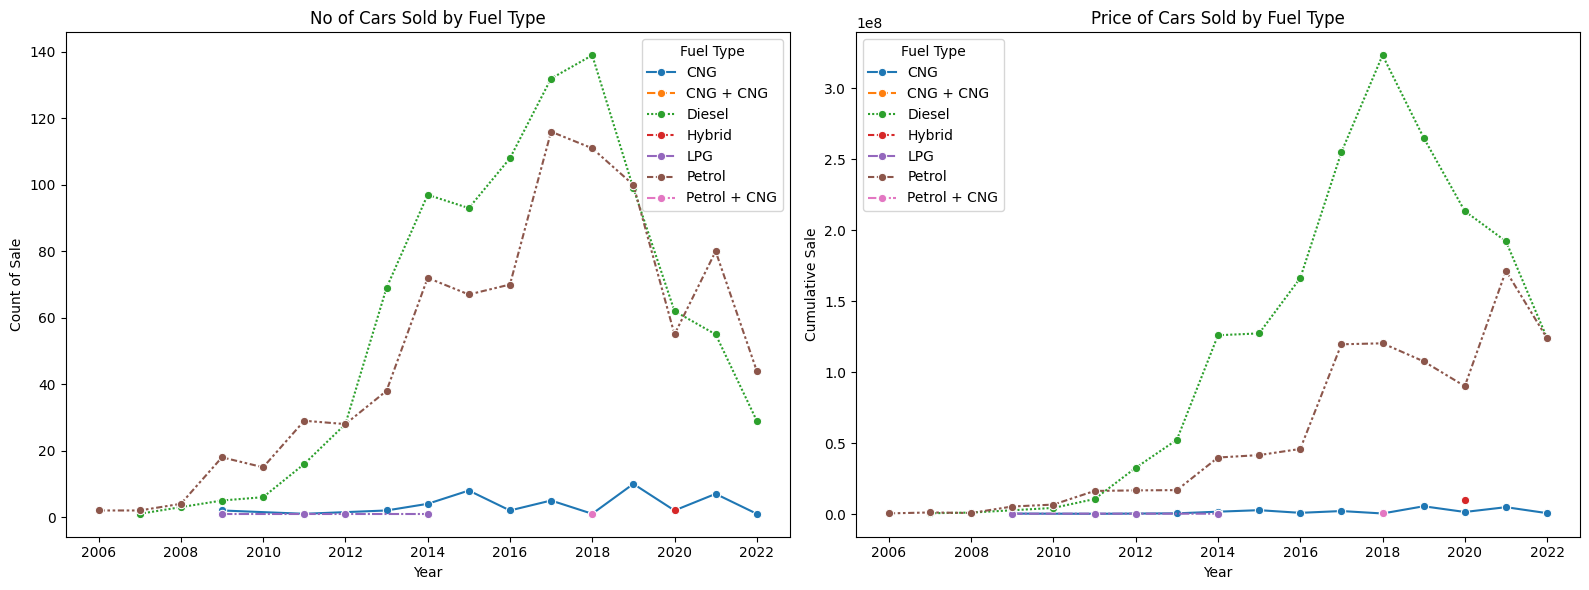

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.lineplot(data=fuel_count, ax=axes[0], marker='o')
axes[0].set_title('No of Cars Sold by Fuel Type')
axes[0].set_ylabel('Count of Sale')
axes[0].set_xlabel('Year')

# Second chart
sns.lineplot(data=fuel_sum, ax=axes[1], marker='o')
axes[1].set_title('Price of Cars Sold by Fuel Type')
axes[1].set_ylabel('Cumulative Sale')
axes[1].set_xlabel('Year')

plt.tight_layout()
plt.show()

**Diesel and Petrol cars sold more. Though the Diesel cars prices were higher, it experienced more number of sales**

**perhaps, this could be that the Diesel cars had a better perfomance and power, and maybe were easier to maintain**

### **Owner Type**

In [38]:
owner_count = dn.pivot_table(index='Year', columns='Owner', values='Price', aggfunc='count')
owner_count

Owner,First,Second,Third,UnRegistered Car
Year,,,,
2006,NaN,NaN,2.00,NaN
2007,1.00,1.00,1.00,NaN
2008,1.00,5.00,1.00,NaN
2009,11.00,12.00,3.00,NaN
2010,12.00,7.00,2.00,NaN
2011,30.00,15.00,2.00,NaN
2012,41.00,14.00,1.00,1.00
2013,73.00,32.00,4.00,NaN
2014,111.00,60.00,4.00,NaN


In [39]:
owner_sum = dn.pivot_table(index='Year', columns='Owner', values='Price', aggfunc='sum')
owner_sum

Owner,First,Second,Third,UnRegistered Car
Year,,,,
2006,NaN,NaN,440000.00,NaN
2007,750000.00,550000.00,345000.00,NaN
2008,495000.00,1038000.00,185000.00,NaN
2009,2605000.00,5229000.00,601000.00,NaN
2010,6063999.00,3684000.00,1190000.00,NaN
2011,14560999.00,9435000.00,3225000.00,NaN
2012,32520996.00,13923999.00,1650000.00,1350000.00
2013,38960997.00,28834997.00,1793000.00,NaN
2014,102602996.00,62022999.00,3180000.00,NaN


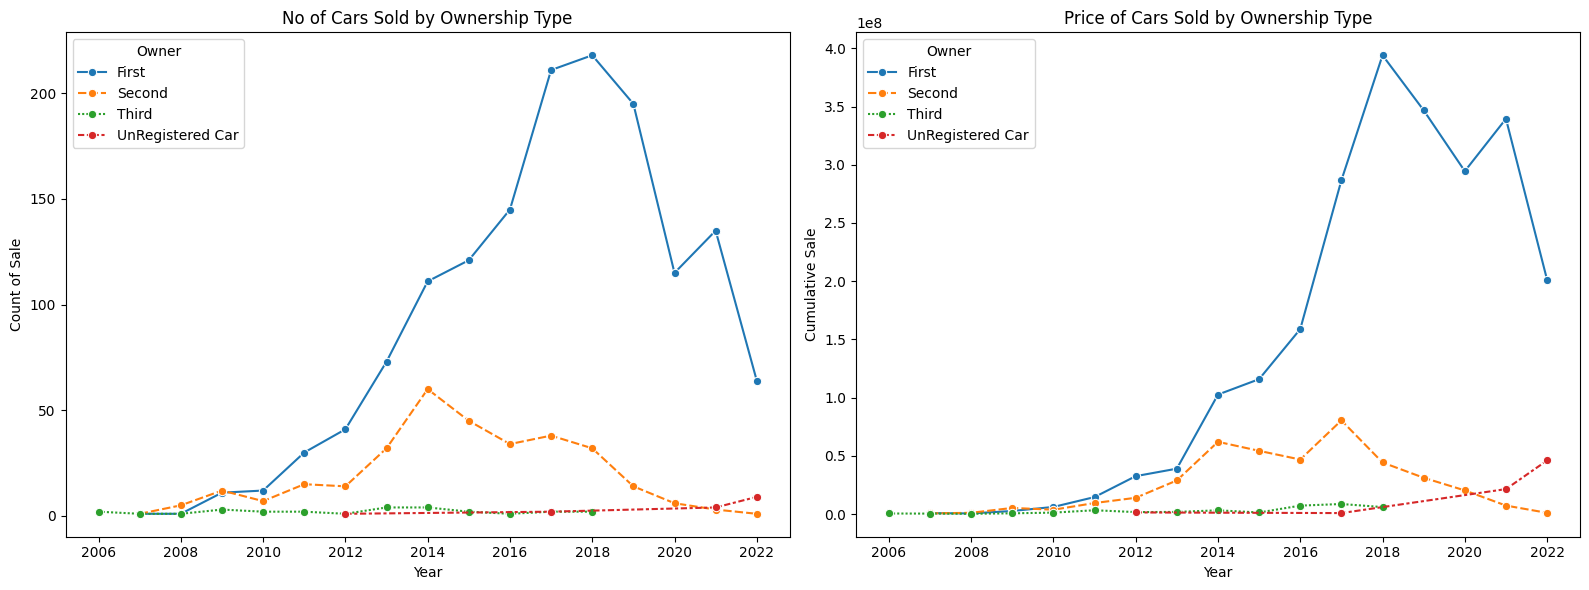

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.lineplot(data=owner_count, ax=axes[0], marker='o')
axes[0].set_title('No of Cars Sold by Ownership Type')
axes[0].set_ylabel('Count of Sale')
axes[0].set_xlabel('Year')

# Second chart
sns.lineplot(data=owner_sum, ax=axes[1], marker='o')
axes[1].set_title('Price of Cars Sold by Ownership Type')
axes[1].set_ylabel('Cumulative Sale')
axes[1].set_xlabel('Year')

plt.tight_layout()
plt.show()

**As expected, over 75% of all sold were sold by First owners**

**These cars will most likely still be in good shape as of the time of sale**

**The more owners a car had, the lesser its worth and sale value**

### **Drivetrain**

In [41]:
drivetrain_count = dn.pivot_table(index='Year', columns='Drivetrain', values='Price', aggfunc='count')
drivetrain_count

Drivetrain,AWD,FWD,RWD
Year,,,
2006,1.00,1.00,NaN
2007,1.00,NaN,2.00
2008,NaN,5.00,2.00
2009,1.00,23.00,2.00
2010,2.00,15.00,4.00
2011,4.00,34.00,9.00
2012,13.00,37.00,7.00
2013,9.00,81.00,19.00
2014,24.00,130.00,21.00


In [42]:
drivetrain_sum = dn.pivot_table(index='Year', columns='Drivetrain', values='Price', aggfunc='sum')
drivetrain_sum

Drivetrain,AWD,FWD,RWD
Year,,,
2006,250000.00,190000.00,NaN
2007,345000.00,NaN,1300000.00
2008,NaN,888000.00,830000.00
2009,1400000.00,5170000.00,1865000.00
2010,1825000.00,4763999.00,4349000.00
2011,4855000.00,12140999.00,10225000.00
2012,23779000.00,16240995.00,9425000.00
2013,13310000.00,36313995.00,19964999.00
2014,64550000.00,72370995.00,30885000.00


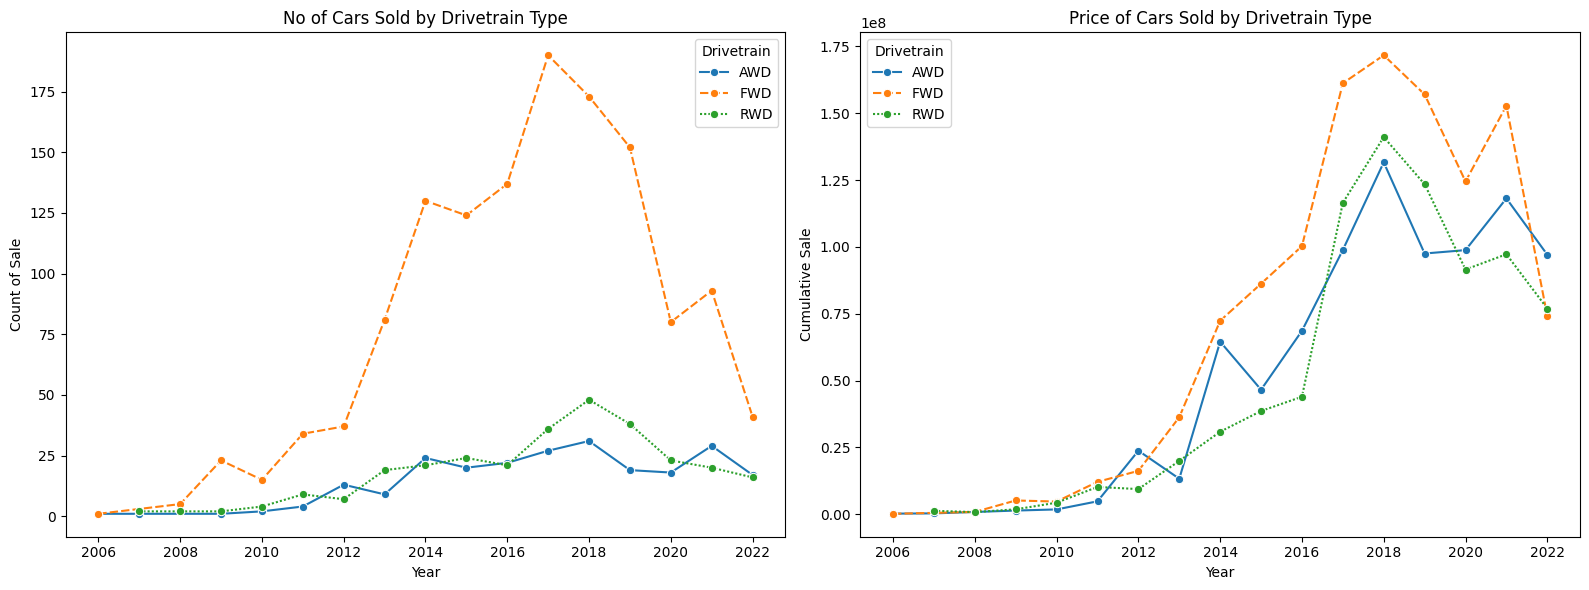

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.lineplot(data=drivetrain_count, ax=axes[0], marker='o')
axes[0].set_title('No of Cars Sold by Drivetrain Type')
axes[0].set_ylabel('Count of Sale')
axes[0].set_xlabel('Year')

# Second chart
sns.lineplot(data=drivetrain_sum, ax=axes[1], marker='o')
axes[1].set_title('Price of Cars Sold by Drivetrain Type')
axes[1].set_ylabel('Cumulative Sale')
axes[1].set_xlabel('Year')

plt.tight_layout()
plt.show()

**The Forward Wheel Drive Drivetrain cars sold more cars**

### **In General**

**Car sales peaked in 2018, with Manual cars dominating sales over Automatic cars from 2008 to 2019 due to their lower cost, although sales of Manual cars declined after 2019. Diesel and Petrol vehicles were the most popular, with Diesel cars achieving higher sales despite being more expensive, likely due to their superior performance and easier maintenance. Most cars sold were from first owners, reflecting better condition and value, while cars with multiple owners saw reduced worth and sales. Additionally, Forward Wheel Drive Drivetrain cars were the preferred choice among buyers.**

### **Based on the trends observed, here are a few recommendations:**

**`Manual vs. Automatic Pricing`**: Given the strong sales of Manual cars, especially due to their lower cost, it may be worthwhile to consider adjusting the pricing of Automatic vehicles or offering additional incentives to make them more appealing to buyers.

**`Diesel Cars' Advantages`**: Diesel cars have shown robust sales despite their higher cost, likely due to their superior performance and power. Emphasizing these benefits in marketing could help attract buyers who value performance and longevity.

**`Focus on First-Time Buyers`**: With over 75% of cars sold being from first owners, targeting first-time car buyers with offers such as warranties, financing options, and maintenance packages could further boost sales. Highlighting the reliability and condition of first-owner cars could also appeal to this market.

**`Encourage Longer Ownership`**: Given that cars with multiple previous owners typically experience lower resale values, promoting longer-term ownership or offering incentives for trade-ins could be beneficial. Providing maintenance packages could also help maintain the car's value over time.

**`Forward Wheel Drive Popularity`**: Since Forward Wheel Drive Drivetrain cars are the most sold, focusing on expanding and promoting this category could be a good strategy to meet consumer demand and capture a larger market share.

By aligning strategies with these insights, manufacturers can enhance their product offerings and better cater to consumer preferences.

## **Developing a Regression Model to predict car prices**

In [44]:
dy=dn.copy()
dy

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Owner,Drivetrain,Seating Capacity,Fuel Tank Capacity
0,Honda,505000,2017,87150,Petrol,Manual,First,FWD,5.00,35.00
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Second,FWD,5.00,42.00
2,Hyundai,220000,2011,67000,Petrol,Manual,First,FWD,5.00,35.00
3,Toyota,799000,2019,37500,Petrol,Manual,First,FWD,5.00,37.00
4,Toyota,1950000,2018,69000,Diesel,Manual,First,RWD,7.00,55.00
...,...,...,...,...,...,...,...,...,...,...
2053,Maruti Suzuki,245000,2014,79000,Petrol,Manual,Second,FWD,5.00,43.00
2054,Mahindra,850000,2016,90300,Diesel,Manual,First,FWD,7.00,70.00
2055,Hyundai,275000,2014,83000,Petrol,Manual,Second,FWD,5.00,32.00
2056,Ford,240000,2013,73000,Petrol,Manual,First,FWD,5.00,45.00


In [45]:
# The Categorical variables for encoding
cat_col=dy.select_dtypes(include='object')
cat_col

,Make,Fuel Type,Transmission,Owner,Drivetrain
0,Honda,Petrol,Manual,First,FWD
1,Maruti Suzuki,Diesel,Manual,Second,FWD
2,Hyundai,Petrol,Manual,First,FWD
3,Toyota,Petrol,Manual,First,FWD
4,Toyota,Diesel,Manual,First,RWD
...,...,...,...,...,...
2053,Maruti Suzuki,Petrol,Manual,Second,FWD
2054,Mahindra,Diesel,Manual,First,FWD
2055,Hyundai,Petrol,Manual,Second,FWD
2056,Ford,Petrol,Manual,First,FWD


In [46]:
cat_col.shape

(1846, 5)

In [47]:
# Previewing the number of unique values in each categorical column
for j in cat_col.columns:
    uniqq = cat_col[j].nunique()
    print(f"{j}:{uniqq}")

Make:30
Fuel Type:7
Transmission:2
Owner:4
Drivetrain:3


**46 new encoded columns will be created**

In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
encoder = OneHotEncoder(sparse_output=False)

**When we encode the selected columns, they will be generated into a new array **`(en_ar)`** which will be converted into a DataFrame **`(en_df)`** before putting back into the original DataFrame **`(dy)`****

In [50]:
en_ar = encoder.fit_transform(cat_col)

In [51]:
en_ar

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [52]:
# Column names
cat_col.columns

Index(['Make', 'Fuel Type', 'Transmission', 'Owner', 'Drivetrain'], dtype='object')

In [53]:
# Converting (en_ar) into a DataFrame (en_df)
en_df = pd.DataFrame(en_ar, columns=encoder.get_feature_names_out(cat_col.columns))

In [54]:
en_df

,Make_Audi,Make_BMW,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Ford,Make_Honda,Make_Hyundai,Make_Isuzu,Make_Jaguar,...,Fuel Type_Petrol + CNG,Transmission_Automatic,Transmission_Manual,Owner_First,Owner_Second,Owner_Third,Owner_UnRegistered Car,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD
0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
1842,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1843,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
1844,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00


In [55]:
en_df.shape

(1846, 46)

**Reset Index before Concatenation to avoid the issue of the shape change and NaN values after Concatenation:**

In [56]:
dy = dy.reset_index(drop=True)
en_df = en_df.reset_index(drop=True)

In [57]:
dy

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Owner,Drivetrain,Seating Capacity,Fuel Tank Capacity
0,Honda,505000,2017,87150,Petrol,Manual,First,FWD,5.00,35.00
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Second,FWD,5.00,42.00
2,Hyundai,220000,2011,67000,Petrol,Manual,First,FWD,5.00,35.00
3,Toyota,799000,2019,37500,Petrol,Manual,First,FWD,5.00,37.00
4,Toyota,1950000,2018,69000,Diesel,Manual,First,RWD,7.00,55.00
...,...,...,...,...,...,...,...,...,...,...
1841,Maruti Suzuki,245000,2014,79000,Petrol,Manual,Second,FWD,5.00,43.00
1842,Mahindra,850000,2016,90300,Diesel,Manual,First,FWD,7.00,70.00
1843,Hyundai,275000,2014,83000,Petrol,Manual,Second,FWD,5.00,32.00
1844,Ford,240000,2013,73000,Petrol,Manual,First,FWD,5.00,45.00


In [58]:
en_df

,Make_Audi,Make_BMW,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Ford,Make_Honda,Make_Hyundai,Make_Isuzu,Make_Jaguar,...,Fuel Type_Petrol + CNG,Transmission_Automatic,Transmission_Manual,Owner_First,Owner_Second,Owner_Third,Owner_UnRegistered Car,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD
0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
1842,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1843,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
1844,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00


**Now we have the encoded DataFrame, we now have to concatenate it to the original DataFrame, while droping the columns that were encoded**

In [59]:
dy = pd.concat([dy, en_df], axis=1).drop(columns=['Make', 'Fuel Type', 'Transmission', 'Owner', 'Drivetrain'],axis=1)
dy

,Price,Year,Kilometer,Seating Capacity,Fuel Tank Capacity,Make_Audi,Make_BMW,Make_Chevrolet,Make_Datsun,Make_Fiat,...,Fuel Type_Petrol + CNG,Transmission_Automatic,Transmission_Manual,Owner_First,Owner_Second,Owner_Third,Owner_UnRegistered Car,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD
0,505000,2017,87150,5.00,35.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1,450000,2014,75000,5.00,42.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
2,220000,2011,67000,5.00,35.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
3,799000,2019,37500,5.00,37.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
4,1950000,2018,69000,7.00,55.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,245000,2014,79000,5.00,43.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
1842,850000,2016,90300,7.00,70.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1843,275000,2014,83000,5.00,32.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
1844,240000,2013,73000,5.00,45.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00


In [60]:
# spliting into Features and Target
x = dy.drop('Price', axis=1)
y = dy['Price']

In [61]:
x

,Year,Kilometer,Seating Capacity,Fuel Tank Capacity,Make_Audi,Make_BMW,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Ford,...,Fuel Type_Petrol + CNG,Transmission_Automatic,Transmission_Manual,Owner_First,Owner_Second,Owner_Third,Owner_UnRegistered Car,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD
0,2017,87150,5.00,35.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1,2014,75000,5.00,42.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
2,2011,67000,5.00,35.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
3,2019,37500,5.00,37.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
4,2018,69000,7.00,55.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,2014,79000,5.00,43.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
1842,2016,90300,7.00,70.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1843,2014,83000,5.00,32.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
1844,2013,73000,5.00,45.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00


In [62]:
y

0        505000
1        450000
2        220000
3        799000
4       1950000
         ...   
1841     245000
1842     850000
1843     275000
1844     240000
1845    4290000
Name: Price, Length: 1846, dtype: int64

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=42)

### **Linear Regression Model**

In [66]:
lrm = LinearRegression()
lrm = lrm.fit(x_train,y_train)
lrm.score(x_train,y_train) #learning score

0.7975367386249171

In [67]:
lrm_pred = lrm.predict(x_test)

In [68]:
lr_MAE = mean_absolute_error(y_test,lrm_pred)
lr_MSE = mean_squared_error(y_test,lrm_pred)
lr_R2_Score = r2_score(y_test,lrm_pred)

In [69]:
print(f"Linear_Regression_MAE : {lr_MAE}\nLinear_Regression_MSE : {lr_MSE}\nLinear_Regression_R2_Score : {lr_R2_Score}")

Linear_Regression_MAE : 539453.3280634292
Linear_Regression_MSE : 636884656765.5159
Linear_Regression_R2_Score : 0.797194146378895


### **Gradient Boosting Model**

In [70]:
gbm = GradientBoostingRegressor()
gbm = gbm.fit(x_train,y_train)
gbm.score(x_train,y_train) #learning score

0.9477114154865083

In [71]:
gbm_pred = gbm.predict(x_test)

In [72]:
gb_MAE = mean_absolute_error(y_test,gbm_pred)
gb_MSE = mean_squared_error(y_test,gbm_pred)
gb_R2_Score = r2_score(y_test,gbm_pred)

In [73]:
print(f"Gradient_Boosting_MAE : {gb_MAE}\nGradient_Boosting_MSE : {gb_MSE}\nGradient_Boosting_R2_Score : {gb_R2_Score}")

Gradient_Boosting_MAE : 364696.78197444364
Gradient_Boosting_MSE : 427265753290.9402
Gradient_Boosting_R2_Score : 0.8639439733729736


### **Random Forest Regressor**

In [74]:
rfm = RandomForestRegressor()
rfm = rfm.fit(x_train,y_train)
rfm.score(x_train,y_train) #learning score

0.9856686330919485

In [75]:
rfm_pred = rfm.predict(x_test)

In [76]:
gb_MAE = mean_absolute_error(y_test,rfm_pred)
gb_MSE = mean_squared_error(y_test,rfm_pred)
gb_R2_Score = r2_score(y_test,rfm_pred)

In [77]:
print(f"Gradient_Boosting_MAE : {gb_MAE}\nGradient_Boosting_MSE : {gb_MSE}\nGradient_Boosting_R2_Score : {gb_R2_Score}")

Gradient_Boosting_MAE : 328691.9274792793
Gradient_Boosting_MSE : 467237042946.7539
Gradient_Boosting_R2_Score : 0.851215747888389


### **Decision Tree Regressor**

In [78]:
dtm = DecisionTreeRegressor()
dtm = dtm.fit(x_train,y_train)
dtm.score(x_train,y_train) #learning score

0.9999778120771426

In [79]:
dtm_pred = dtm.predict(x_test)

In [80]:
gb_MAE = mean_absolute_error(y_test,dtm_pred)
gb_MSE = mean_squared_error(y_test,dtm_pred)
gb_R2_Score = r2_score(y_test,dtm_pred)

In [81]:
print(f"Gradient_Boosting_MAE : {gb_MAE}\nGradient_Boosting_MSE : {gb_MSE}\nGradient_Boosting_R2_Score : {gb_R2_Score}")

Gradient_Boosting_MAE : 410810.82702702703
Gradient_Boosting_MSE : 733831770259.5405
Gradient_Boosting_R2_Score : 0.7663228702390199
